https://scikit-learn.org/1.5/modules/neural_networks_supervised.html

In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 28.5 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
data = r'/content/drive/MyDrive/intento_cosas/ica_dc_prom+label.csv'

Mounted at /content/drive


In [4]:
data = pd.read_csv(data, index_col=0)
data = data.sort_values(['file_name'])
data



,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./dc_101915_01.nii.gz,262043.300,187233.16,143375.780,6402.0366,139273.310,3024.4473,163753.800,279341.700,168373.670,190227.56,...,219690.390,385215.16,311394.62,224082.560,325322.780,284040.30,354002.16,-52402.906,187838.55,1
./dc_101915_02.nii.gz,298430.060,155834.36,136208.110,144980.3400,115673.625,14436.4100,612952.300,77421.830,378232.620,432095.50,...,45955.510,348572.28,262158.38,121290.984,509985.600,236981.00,618501.70,-112282.850,136809.03,1
./dc_101915_03.nii.gz,368673.100,44635.09,216828.560,161836.6400,76016.350,44886.7970,791992.300,50519.934,450831.940,402999.40,...,36172.766,613976.30,218903.14,77680.520,510786.120,91474.75,701637.70,-158362.450,111272.36,1
./dc_103515_01.nii.gz,-19778.818,468885.06,94755.030,71594.6500,303660.400,-7344.3400,89372.445,382268.280,210899.720,103314.11,...,208808.810,98046.75,327309.34,96129.050,25555.057,803393.70,206991.06,-33232.150,361470.66,2
./dc_103515_02.nii.gz,113684.030,386784.84,159351.530,79034.7100,210211.550,19733.8710,144083.050,328625.780,151701.220,247671.08,...,129663.370,84435.83,328451.44,176498.970,105656.460,858347.25,358009.25,-35126.867,345777.80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dc_987983_02.nii.gz,283038.340,224039.27,209265.920,309096.8800,39423.800,-31384.0660,404199.720,117932.820,392027.700,117405.37,...,51056.450,389026.06,420045.22,424761.720,237264.080,322418.62,354036.47,-96827.140,290436.47,1
./dc_987983_03.nii.gz,454999.660,194057.58,254070.480,240185.6000,72110.430,-3136.3848,397577.400,154713.000,320569.160,136803.97,...,76918.040,413621.44,384469.90,426595.380,284696.500,320754.84,459920.30,-105997.560,222227.02,1
./dc_993675_01.nii.gz,338534.400,304662.72,104748.734,362514.5000,78166.625,156558.2500,202891.230,224283.170,177622.440,144296.39,...,100095.984,600215.50,360322.25,108567.450,226502.390,485350.10,479611.50,-64337.855,266775.50,1


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = data['label']  # Esta será nuestra etiqueta

print(X, y)

                       component_1  component_2  component_3  component_4  \
file_name                                                                   
./dc_101915_01.nii.gz   262043.300    187233.16   143375.780    6402.0366   
./dc_101915_02.nii.gz   298430.060    155834.36   136208.110  144980.3400   
./dc_101915_03.nii.gz   368673.100     44635.09   216828.560  161836.6400   
./dc_103515_01.nii.gz   -19778.818    468885.06    94755.030   71594.6500   
./dc_103515_02.nii.gz   113684.030    386784.84   159351.530   79034.7100   
...                            ...          ...          ...          ...   
./dc_987983_02.nii.gz   283038.340    224039.27   209265.920  309096.8800   
./dc_987983_03.nii.gz   454999.660    194057.58   254070.480  240185.6000   
./dc_993675_01.nii.gz   338534.400    304662.72   104748.734  362514.5000   
./dc_993675_02.nii.gz   374900.600    319633.40   115432.520  376520.1600   
./dc_993675_03.nii.gz   392260.340    388645.88   100101.460  237136.4500   

In [6]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.35714286, 0.44642857, 0.42857143, 0.55357143, 0.30909091])

In [7]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.42 accuracy with a standard deviation of 0.08


In [8]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]//3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos


# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

file_name
./dc_101915_01.nii.gz    1
./dc_101915_02.nii.gz    1
./dc_101915_03.nii.gz    1
./dc_103515_01.nii.gz    2
./dc_103515_02.nii.gz    2
                        ..
./dc_970764_02.nii.gz    1
./dc_970764_03.nii.gz    1
./dc_987983_01.nii.gz    1
./dc_987983_02.nii.gz    1
./dc_987983_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.43      0.12      0.19        24
           1       0.58      0.67      0.62        42
           2       0.26      0.37      0.31        27

    accuracy                           0.44        93
   macro avg       0.43      0.39      0.37        93
weighted avg       0.45      0.44      0.42        93

file_name
./dc_101915_01.nii.gz    1
./dc_101915_02.nii.gz    1
./dc_101915_03.nii.gz    1
./dc_103515_01.nii.gz    2
./dc_103515_02.nii.gz    2
                        ..
./dc_987983_02.nii.gz    1
./dc_987983_03.nii.gz    1
./dc_993675_01.nii.gz    1
./dc_993675_02.nii.g

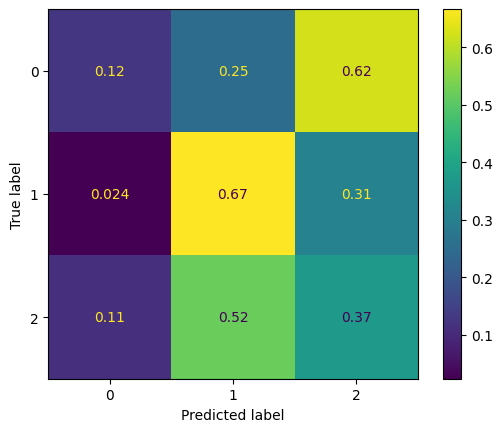

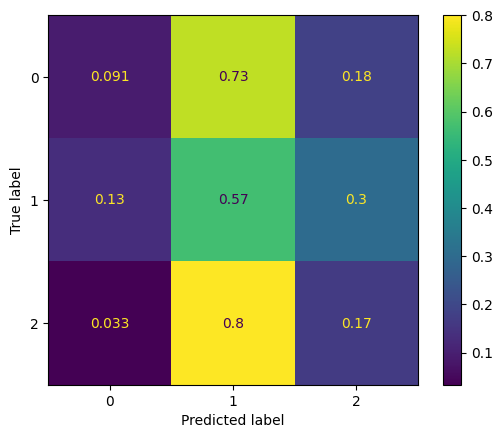

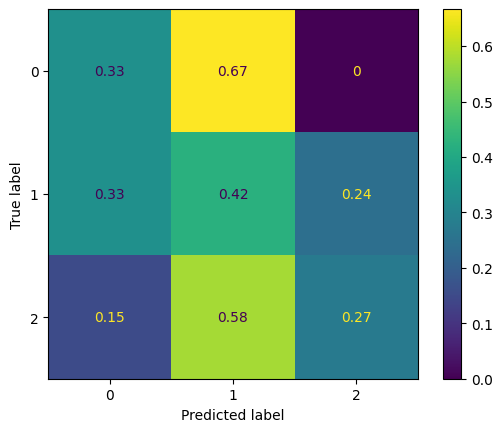

In [9]:
classif = svm.SVC()
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba usando iloc
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    classif.fit(X_train, y_train)
    y_pred = classif.predict(X_test)
    print(y_train)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


# Random Forest:

Probaremos ahora con otro modelo

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

file_name
./dc_101915_01.nii.gz    1
./dc_101915_02.nii.gz    1
./dc_101915_03.nii.gz    1
./dc_103515_01.nii.gz    2
./dc_103515_02.nii.gz    2
                        ..
./dc_970764_02.nii.gz    1
./dc_970764_03.nii.gz    1
./dc_987983_01.nii.gz    1
./dc_987983_02.nii.gz    1
./dc_987983_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.33      0.25      0.29        24
           1       0.55      0.64      0.59        42
           2       0.35      0.33      0.34        27

    accuracy                           0.45        93
   macro avg       0.41      0.41      0.41        93
weighted avg       0.44      0.45      0.44        93

file_name
./dc_101915_01.nii.gz    1
./dc_101915_02.nii.gz    1
./dc_101915_03.nii.gz    1
./dc_103515_01.nii.gz    2
./dc_103515_02.nii.gz    2
                        ..
./dc_987983_02.nii.gz    1
./dc_987983_03.nii.gz    1
./dc_993675_01.nii.gz    1
./dc_993675_02.nii.g

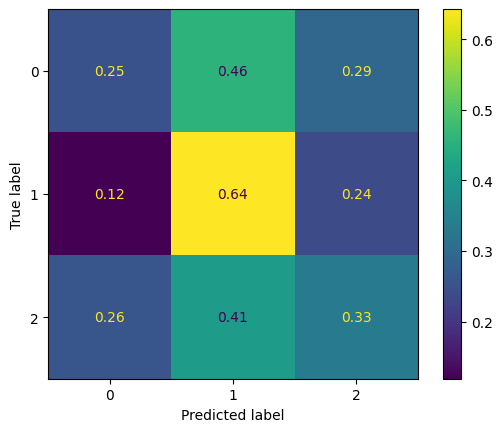

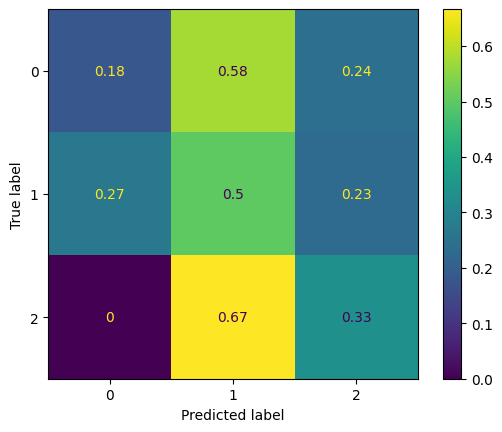

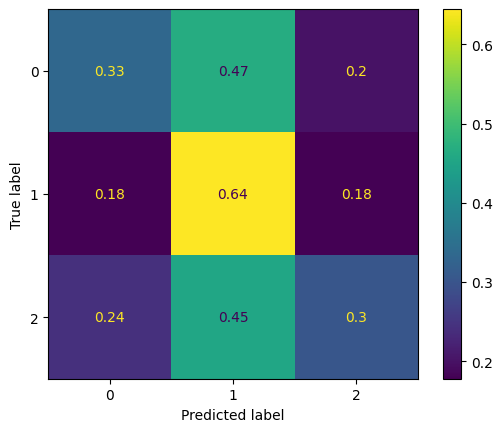

In [11]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba usando iloc
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    print(y_train)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


In [12]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

         Feature  Importance
14  component_15    0.070674
9   component_10    0.058968
6    component_7    0.058058
18  component_19    0.054490
19  component_20    0.054483
2    component_3    0.053404
5    component_6    0.052770
3    component_4    0.052235
7    component_8    0.051536
4    component_5    0.050641


In [13]:
# reho_ica_bien_0.csv

# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/ica_dc_prom+label2.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/ica_dc_prom+label0.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/ica_dc_prom+label1.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./dc_103515_01.nii.gz,-19778.818,468885.06,94755.03,71594.650,303660.400,-7344.340,89372.445,382268.28,210899.72,103314.110,...,208808.810,98046.75,327309.34,96129.05,25555.057,803393.70,206991.06,-33232.150,361470.66,2
./dc_103515_02.nii.gz,113684.030,386784.84,159351.53,79034.710,210211.550,19733.871,144083.050,328625.78,151701.22,247671.080,...,129663.370,84435.83,328451.44,176498.97,105656.460,858347.25,358009.25,-35126.867,345777.80,2
./dc_103515_03.nii.gz,250474.830,278258.70,219632.75,69257.670,169042.770,-15059.496,218775.600,256450.95,202520.69,372450.160,...,109417.210,92206.31,353281.50,213686.10,118843.970,631895.56,509144.72,-46205.324,283862.12,2
./dc_104820_01.nii.gz,57619.977,100068.31,594246.44,207036.800,129741.280,104959.445,134817.000,86947.66,169565.27,129780.790,...,46072.566,191930.58,186765.69,280462.20,531817.940,246113.19,522105.38,40026.550,161721.06,2
./dc_104820_02.nii.gz,54176.960,184096.03,417562.78,142264.170,144893.280,100878.130,150951.220,117672.36,153941.58,214320.880,...,94434.650,210018.47,155146.62,302627.22,341326.160,376928.70,416567.03,37340.516,239934.94,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dc_809252_02.nii.gz,371151.720,258031.34,158994.40,159347.730,184436.060,40004.465,107937.110,393507.12,273658.44,170486.100,...,165895.810,391529.12,347754.60,308732.90,285829.780,480353.06,513306.62,-76953.090,233802.48,2
./dc_809252_03.nii.gz,122461.160,191582.83,38037.76,64410.527,463318.380,-33155.760,54010.234,572640.80,192969.88,122541.625,...,309412.300,144773.88,227212.14,167887.53,54782.496,884849.60,160149.00,-68680.000,263695.00,2
./dc_822244_01.nii.gz,199854.480,415268.44,124257.98,45723.420,70580.940,45286.977,149870.500,149720.27,445941.06,253500.890,...,108970.180,577496.70,425329.10,255833.39,321693.800,369469.00,486150.10,-58186.504,181059.92,2


In [15]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./dc_114823_01.nii.gz,185394.980,101821.7660,53827.830,-124455.510,80371.880,60812.4960,149007.300,375664.4000,140076.470,725585.44,...,175299.94000,432822.340000,855494.60,243636.05,147442.4800,343213.72,276550.800,4845.7530,312083.880,0
./dc_114823_02.nii.gz,155327.030,147370.1700,152753.700,171243.400,69234.016,70533.0160,173762.660,200125.4500,292931.030,498844.53,...,77573.67000,490936.600000,924523.30,224311.28,326108.7000,345329.75,527706.000,-23906.7580,394813.720,0
./dc_114823_03.nii.gz,232975.060,156519.3800,255416.000,109434.516,115003.520,64836.6200,163155.580,230604.3900,270223.160,356478.12,...,109878.21000,639292.300000,791546.75,190761.83,311846.8400,481140.22,563789.400,-52916.7900,252092.620,0
./dc_117122_01.nii.gz,237438.380,176872.2700,84075.070,116875.970,116081.875,202825.8600,356678.060,104921.2700,379289.840,200110.62,...,99650.32000,148182.300000,244179.28,420015.60,261330.8800,198205.31,448789.600,69016.8500,120915.330,0
./dc_117122_02.nii.gz,97544.414,98082.8200,43159.086,157828.200,119235.250,283873.4700,357181.970,88478.1700,236517.750,277713.80,...,87241.95000,103954.950000,170558.17,444761.25,174522.9700,145550.08,154868.600,119186.5800,175115.880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dc_861456_02.nii.gz,328581.300,103312.9400,198602.880,43253.293,122968.070,35984.5740,604027.560,-6233.8076,381718.100,667792.80,...,30464.64500,373299.030000,229327.90,163433.88,539030.6000,246706.30,750623.500,-47400.1400,103214.950,0
./dc_861456_03.nii.gz,363993.000,6152.5140,179235.530,-109300.510,101640.140,3395.1504,717275.750,13932.4530,415271.900,507529.88,...,43305.15200,416567.660000,96594.83,168559.39,740770.8000,185287.81,867037.400,29310.4410,31426.297,0
./dc_902242_01.nii.gz,-23670.195,-17439.6100,9147.725,77943.960,5380.659,84175.3200,21921.781,113042.4700,-28986.220,448233.20,...,703.28186,-14.028564,304858.20,116814.59,3282.5667,173844.97,-32025.072,-4458.0090,1964719.900,0


In [16]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./dc_101915_01.nii.gz,262043.30,187233.16,143375.780,6402.0366,139273.310,3024.4473,163753.800,279341.700,168373.670,190227.56,...,219690.390,385215.16,311394.62,224082.560,325322.78,284040.30,354002.16,-52402.906,187838.55,1
./dc_101915_02.nii.gz,298430.06,155834.36,136208.110,144980.3400,115673.625,14436.4100,612952.300,77421.830,378232.620,432095.50,...,45955.510,348572.28,262158.38,121290.984,509985.60,236981.00,618501.70,-112282.850,136809.03,1
./dc_101915_03.nii.gz,368673.10,44635.09,216828.560,161836.6400,76016.350,44886.7970,791992.300,50519.934,450831.940,402999.40,...,36172.766,613976.30,218903.14,77680.520,510786.12,91474.75,701637.70,-158362.450,111272.36,1
./dc_128632_01.nii.gz,274863.88,221341.86,126955.560,122063.2700,56631.350,-8648.1230,297417.250,197745.000,496674.220,141542.31,...,74963.980,244810.03,761507.80,50719.246,378259.22,338409.78,255782.72,-71017.970,230513.34,1
./dc_128632_02.nii.gz,275534.60,298163.25,145000.940,228850.3800,88351.010,13614.4390,493277.060,98968.320,601263.250,158964.72,...,42070.582,267716.72,686894.20,82746.220,374473.94,349329.20,352056.12,-72415.790,182458.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dc_987983_02.nii.gz,283038.34,224039.27,209265.920,309096.8800,39423.800,-31384.0660,404199.720,117932.820,392027.700,117405.37,...,51056.450,389026.06,420045.22,424761.720,237264.08,322418.62,354036.47,-96827.140,290436.47,1
./dc_987983_03.nii.gz,454999.66,194057.58,254070.480,240185.6000,72110.430,-3136.3848,397577.400,154713.000,320569.160,136803.97,...,76918.040,413621.44,384469.90,426595.380,284696.50,320754.84,459920.30,-105997.560,222227.02,1
./dc_993675_01.nii.gz,338534.40,304662.72,104748.734,362514.5000,78166.625,156558.2500,202891.230,224283.170,177622.440,144296.39,...,100095.984,600215.50,360322.25,108567.450,226502.39,485350.10,479611.50,-64337.855,266775.50,1


In [17]:
from sklearn.model_selection import train_test_split

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 23*3 #int(len(data_men)*0.7)
prlof = 23*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['label']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['label'] = 'menstrual'
data_pr['label'] = 'proliferativo'
data_lut['label'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['label']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['label']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 66 muestras


In [18]:
print(X_train, y_train)
print(X_test, y_test)

     component_1  component_2  component_3  component_4  component_5  \
0     185394.980   101821.766    53827.830  -124455.510    80371.880   
1     155327.030   147370.170   152753.700   171243.400    69234.016   
2     232975.060   156519.380   255416.000   109434.516   115003.520   
3     237438.380   176872.270    84075.070   116875.970   116081.875   
4      97544.414    98082.820    43159.086   157828.200   119235.250   
..           ...          ...          ...          ...          ...   
208   175286.390   249153.160   150292.310   156965.550    78074.420   
209   231721.080   216482.330   150801.270   168550.190   121819.740   
210   168631.200    80665.250   147336.200   310812.280    93505.320   
211   357739.030    96484.140   134780.730    54442.855    53899.710   
212   209227.060    98727.540   142382.340   204991.330    93330.670   

     component_6  component_7  component_8  component_9  component_10  \
0      60812.496   149007.300    375664.40   140076.470     72

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[-3.37502699e-01 -8.11361587e-01 -1.12244556e+00 ... -6.39660315e-01
   1.73958656e-01  3.37472848e-01]
 [-5.50956830e-01 -4.36826543e-01 -2.92908634e-01 ...  8.67704736e-01
  -1.68918806e-01  6.99726963e-01]
 [ 2.71063444e-04 -3.61594494e-01  5.67959897e-01 ...  1.08426747e+00
  -5.14867239e-01  7.47855170e-02]
 ...
 [-4.56509751e-01 -9.85327214e-01 -3.38336754e-01 ... -2.32179154e-01
  -3.70354482e-01  2.82918432e-02]
 [ 8.85977763e-01 -8.55251774e-01 -4.43619891e-01 ... -1.32244359e+00
  -1.37162182e-01  1.06803185e-01]
 [-1.68317374e-01 -8.36804763e-01 -3.79877048e-01 ...  5.51992687e-01
  -2.05983115e-01 -3.85444988e-02]]


In [20]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0   -0.337503 -0.811362 -1.122446 -2.636965 -0.644424  0.605327 -0.730702   
1   -0.550957 -0.436827 -0.292909  0.074715 -0.736464  0.745352 -0.621656   
2    0.000271 -0.361594  0.567960 -0.492098 -0.358236  0.663295 -0.668379   
3    0.031956 -0.194237 -0.868809 -0.423857 -0.349324  2.651049  0.184080   
4   -0.961159 -0.842106 -1.211908 -0.048308 -0.323266  3.818551  0.186299   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.409264  0.400114 -0.313548 -0.056219 -0.663409 -1.146870 -0.410989   
209 -0.008631  0.131468 -0.309281  0.050017 -0.301908 -0.703471  0.023934   
210 -0.456510 -0.985327 -0.338337  1.354618 -0.535892  1.556390 -0.739179   
211  0.885978 -0.855252 -0.443620 -0.996394 -0.863183  0.767599 -0.949616   
212 -0.168317 -0.836805 -0.379877  0.384197 -0.537335  1.172102 -0.573921   

           7         8         9         10        11        12        13  

In [21]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0  -0.337503 -0.811362 -1.122446 -2.636965 -0.644424  0.605327 -0.730702   
1  -0.550957 -0.436827 -0.292909  0.074715 -0.736464  0.745352 -0.621656   
2   0.000271 -0.361594  0.567960 -0.492098 -0.358236  0.663295 -0.668379   
3   0.031956 -0.194237 -0.868809 -0.423857 -0.349324  2.651049  0.184080   
4  -0.961159 -0.842106 -1.211908 -0.048308 -0.323266  3.818551  0.186299   
..       ...       ...       ...       ...       ...       ...       ...   
64 -0.057727  1.683720 -0.599715 -0.333915  0.046604 -0.725558 -0.960792   
65  0.334993  0.211835 -0.435644 -0.153835 -0.368295 -0.171588 -0.804808   
66 -0.833136  0.510340 -0.482515 -1.941073 -0.179299 -0.381156  0.153761   
67  0.678985 -0.799100  0.091557 -1.099007 -0.292419  0.247677  1.273645   
68  0.930375 -1.598030 -0.070847 -2.497987 -0.468668 -0.221778  1.772498   

          7         8         9         10        11        12  

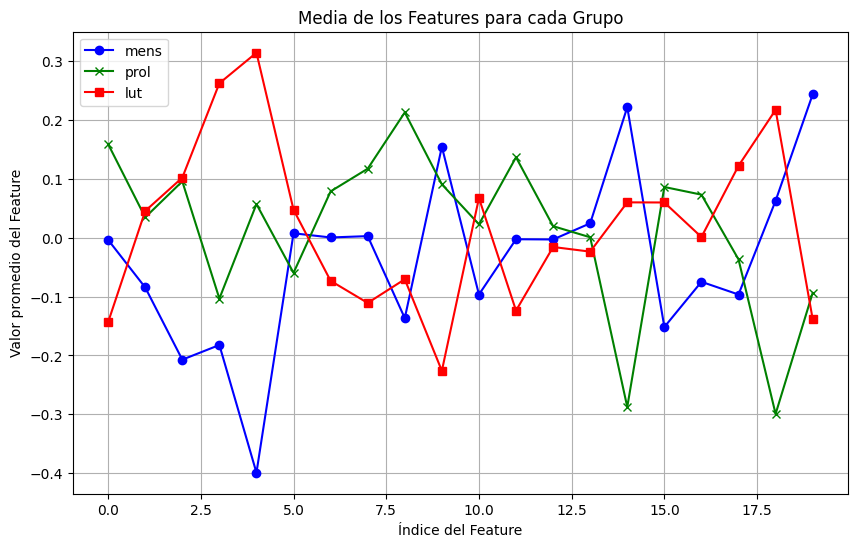

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



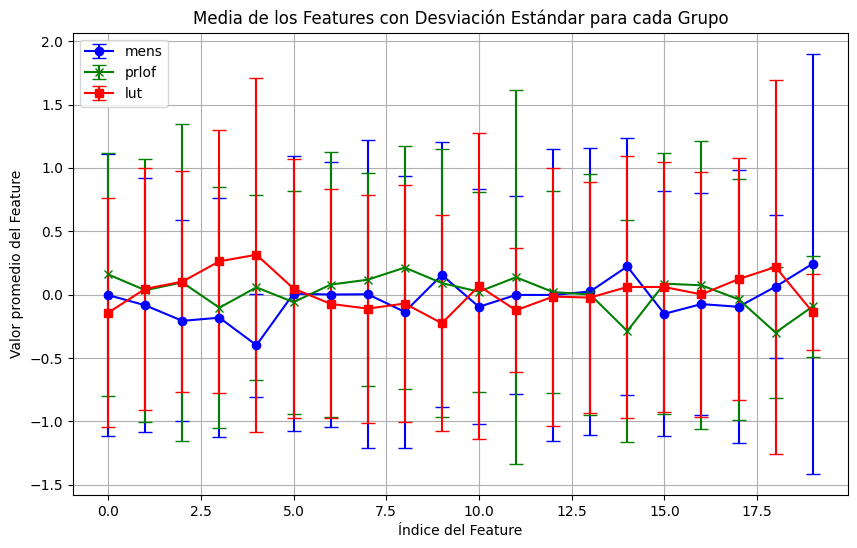

In [23]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


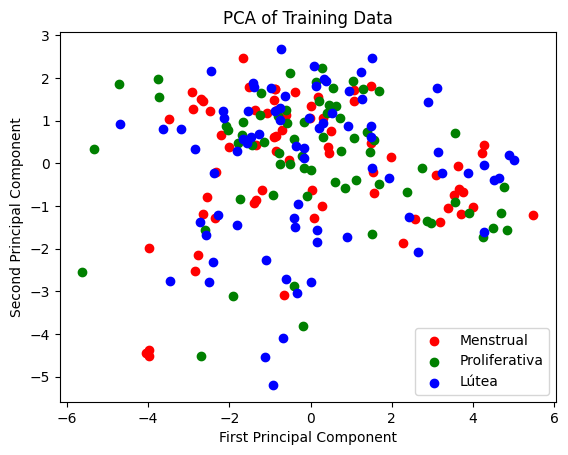

In [24]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [25]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [26]:
metrics.accuracy_score(y_test, y_predict)

0.4393939393939394

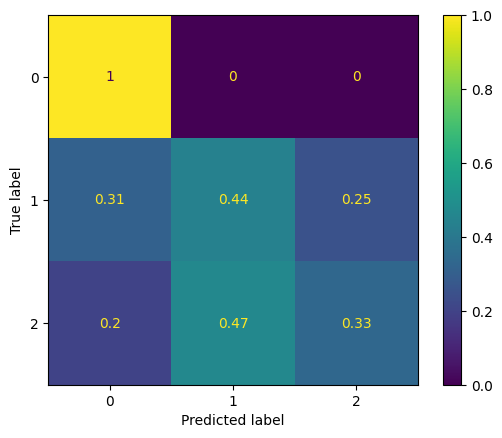

In [27]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [28]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.3787878787878788


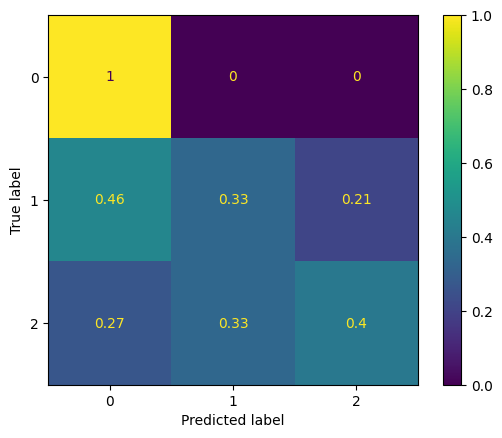

In [29]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.36363636363636365
Classification Report:
               precision    recall  f1-score   support

           0       0.12      1.00      0.21         3
           1       0.73      0.33      0.46        48
           2       0.26      0.33      0.29        15

    accuracy                           0.36        66
   macro avg       0.37      0.56      0.32        66
weighted avg       0.59      0.36      0.41        66



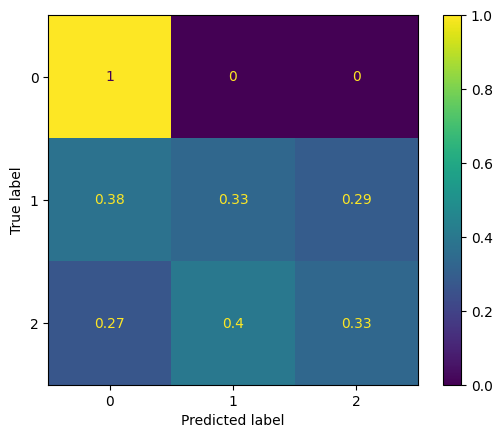

In [32]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [33]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

         Feature  Importance
4    component_5    0.078921
18  component_19    0.076411
8    component_9    0.062218
14  component_15    0.057930
9   component_10    0.053963
6    component_7    0.053745
10  component_11    0.051522
2    component_3    0.051091
5    component_6    0.049538
19  component_20    0.047094


In [34]:
pip install tensorflow

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4423 - loss: 1.0812 - val_accuracy: 0.4464 - val_loss: 1.1031
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4893 - loss: 1.0082 - val_accuracy: 0.4464 - val_loss: 1.0881
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4867 - loss: 1.0013 - val_accuracy: 0.4821 - val_loss: 1.0743
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5905 - loss: 0.9379 - val_accuracy: 0.4643 - val_loss: 1.0606
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5521 - loss: 0.9335 - val_accuracy: 0.5179 - val_loss: 1.0511
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5540 - loss: 0.9065 - val_accuracy: 0.5357 - val_loss: 1.0369
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5877 - loss: 0.8900 - val_accuracy: 0.5536 - val_loss: 1.0284
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6117 - loss: 0.8722 - val_accuracy: 0.5357 - va

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Matriz de confusión:
[[ 6  4  5]
 [ 2 16  4]
 [ 1  5 13]]


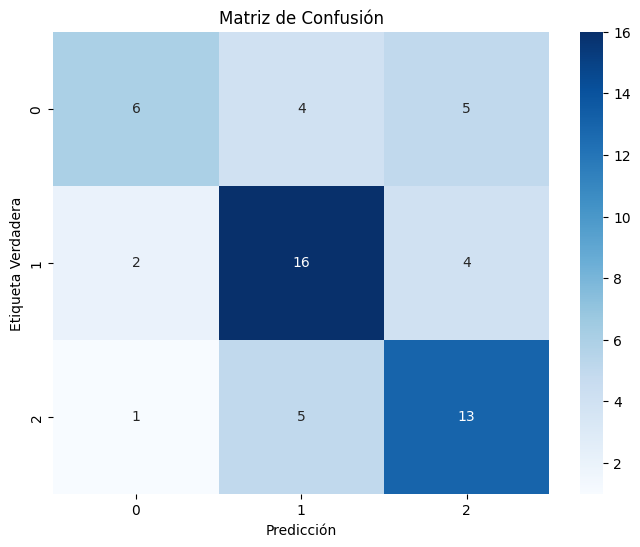

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [37]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.3128 - loss: 1.2184 - val_accuracy: 0.4242 - val_loss: 1.0884
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4898 - loss: 1.0342 - val_accuracy: 0.3788 - val_loss: 1.1265
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4865 - loss: 1.0158 - val_accuracy: 0.3333 - val_loss: 1.1305
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5806 - loss: 0.9830 - val_accuracy: 0.3182 - val_loss: 1.1140
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6201 - loss: 0.9352 - val_accuracy: 0.2879 - val_loss: 1.1176
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6237 - loss: 0.8909 - val_accuracy: 0.3182 - val_loss: 1.1131
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6689 - loss: 0.8498 - val_accuracy: 0.3182 - val_loss: 1.1260
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6123 - loss: 0.8562 - val_accuracy: 0.3182 - val

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Matriz de confusión:
[[ 3  0  0]
 [16 18 14]
 [ 8  5  2]]


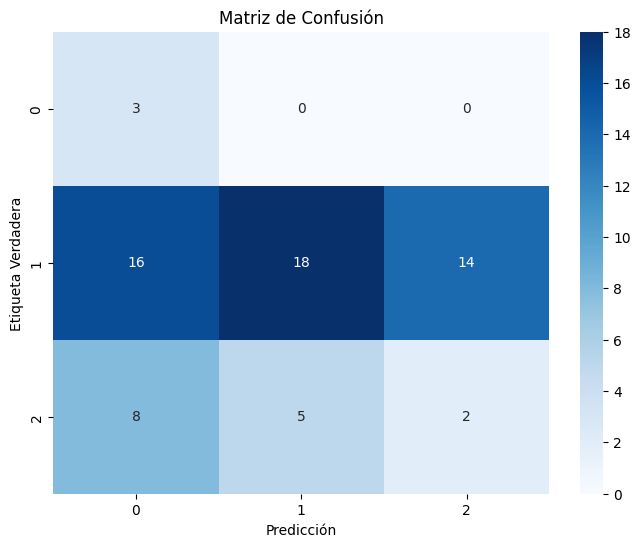

Reporte de clasificación:


TypeError: object of type 'numpy.int64' has no len()

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [43]:
men = 10*3
prlof = 10*3 #int(len(data_pr)*0.7)
lut = 20*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train2 = data_men.iloc[:men]
data_pro_train2 = data_pr.iloc[:prlof]
data_lut_train2 = data_lut.iloc[:lut]

data_men_test2 = data_men.iloc[men:]
data_pro_test2 = data_pr.iloc[prlof:]
data_lut_test2 = data_lut.iloc[lut:]

data_pro_train2 = data_pro_train2.drop(columns=['label'])
data_lut_train2 = data_lut_train2.drop(columns=['label'])
data_men_train2['label'] = '0'
data_pro_train2['label'] = '0'
data_lut_train2['label'] = '1'

data_pro_test2 = data_pro_test2.drop(columns=['label'])
data_lut_test2 = data_lut_test2.drop(columns=['label'])
data_men_test2['label'] = '0'
data_pro_test2['label'] = '0'
data_lut_test2['label'] = '1'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train2 = pd.concat([data_men_train2, data_pro_train2, data_lut_train2], ignore_index=True)
df_all_test2 = pd.concat([data_men_test2, data_pro_test2, data_lut_test2], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train2 = df_all_train2.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_train2 = df_all_train2['label']  # Esta será nuestra etiqueta


X_test2 = df_all_test2.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_test2 = df_all_test2['label']  # Esta será nuestra etiqueta



print(y_train2)
print(y_test2)


0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: label, Length: 120, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
154    1
155    1
156    1
157    1
158    1
Name: label, Length: 159, dtype: object


<ipython-input-43-73110b0f990f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_men_train2['label'] = '0'
<ipython-input-43-73110b0f990f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_men_test2['label'] = '0'


In [44]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train2 = y_train2.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_test_scaled2 = scaler.transform(X_test2)


In [45]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled2, y_train2)
y_predict2 = classifier.predict(X_test_scaled2)

In [46]:
metrics.accuracy_score(y_test2, y_predict2)

0.5094339622641509

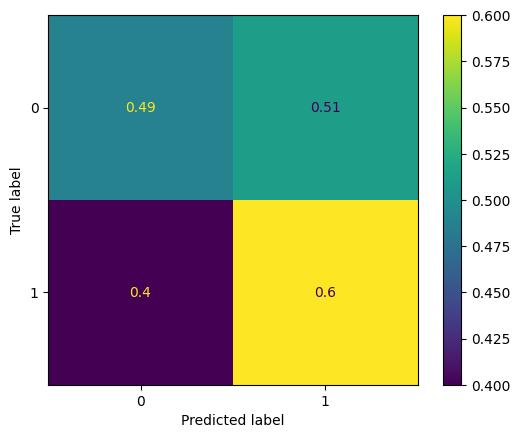

In [47]:
conf_mat = metrics.confusion_matrix(y_test2, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [49]:
y_pred2 = random_forest.predict(X_test2)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Accuracy: 0.5723270440251572
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.70       129
           1       0.17      0.33      0.23        30

    accuracy                           0.57       159
   macro avg       0.49      0.48      0.47       159
weighted avg       0.68      0.57      0.61       159



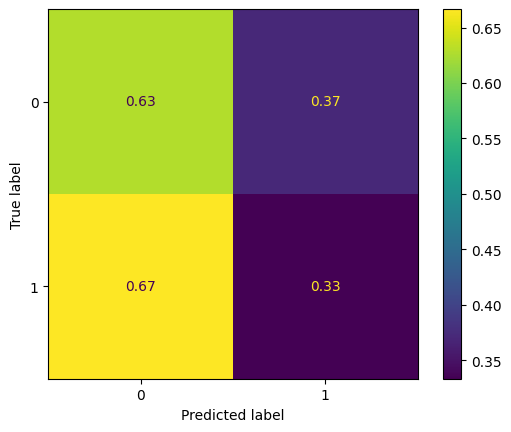

In [50]:
conf_mat = metrics.confusion_matrix(y_test2, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [51]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test2 = encoder.fit_transform(y_test2)
y_encoded_train2 = encoder.fit_transform(y_train2)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

y_onehot_test2 = to_categorical(y_encoded_test2)
y_onehot_train2 = to_categorical(y_encoded_train2)

print(y_onehot_test2)
print(y_onehot_train2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [52]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(2, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled2, y_onehot_train2, epochs=50, batch_size=16, validation_data=(X_test_scaled2, y_onehot_test2))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled2, y_onehot_test2)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.4267 - loss: 0.7509 - val_accuracy: 0.7170 - val_loss: 0.5795
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6488 - loss: 0.6311 - val_accuracy: 0.6541 - val_loss: 0.6087
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6313 - loss: 0.6240 - val_accuracy: 0.6478 - val_loss: 0.6138
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7742 - loss: 0.5611 - val_accuracy: 0.6415 - val_loss: 0.6154
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7845 - loss: 0.5551 - val_accuracy: 0.6415 - val_loss: 0.6212
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7190 - loss: 0.5437 - val_accuracy: 0.6604 - val_loss: 0.6235
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7966 - loss: 0.4920 - val_accuracy: 0.6604 - val_loss: 0.6198
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7938 - loss: 0.4815 - val_accuracy: 0.6541 - val_loss: 0.6270


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Matriz de confusión:
[[77 52]
 [15 15]]


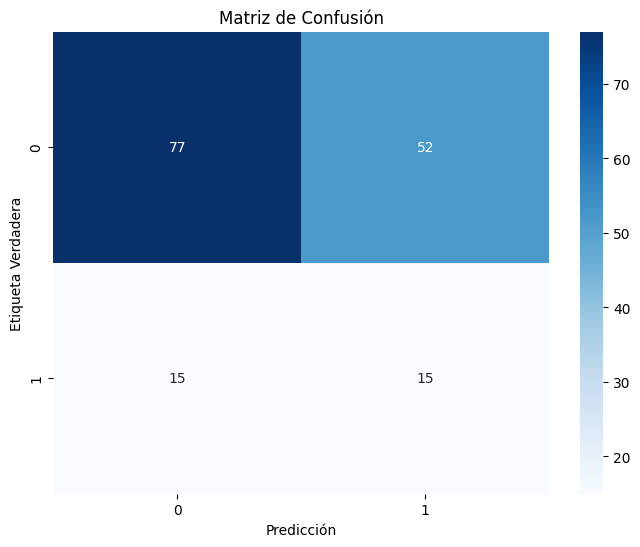

In [53]:
# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled2)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test2, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()